In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score 
import seaborn as sns 
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
data=pd.read_excel('D:/excelexamples/health care diabetes.xlsx') 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data. describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Identifying the mean of the features

In [9]:
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean()) 
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


# Finding the number of rows which has the null values 


In [10]:

print('Glucose-',len(data['Glucose'][data['Glucose']==0])) 
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0])) 
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0])) 
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


# # Finding the null value percentage 

In [11]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin'] 
null_percentage = (data[selected_columns] == 0).mean() * 100 
# Displaying the null value percentage for each selected column 
print("Percentage of Null Values for Each Column:") 
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


# Replacing the null values with the mean

In [12]:
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()]) 
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()]) 
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()]) 
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

# Checking the null value percentage of the treated columns

In [13]:
null_percentage_treated = (data[selected_columns] == 0).mean() * 100 
# Displaying the null value percentage for each selected column 
print("Percentage of Null Values for Each Column after the null value treatment:") 
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


In [14]:
columns=data[selected_columns]

# Display boxplots for numeric columns to visualize outliers 


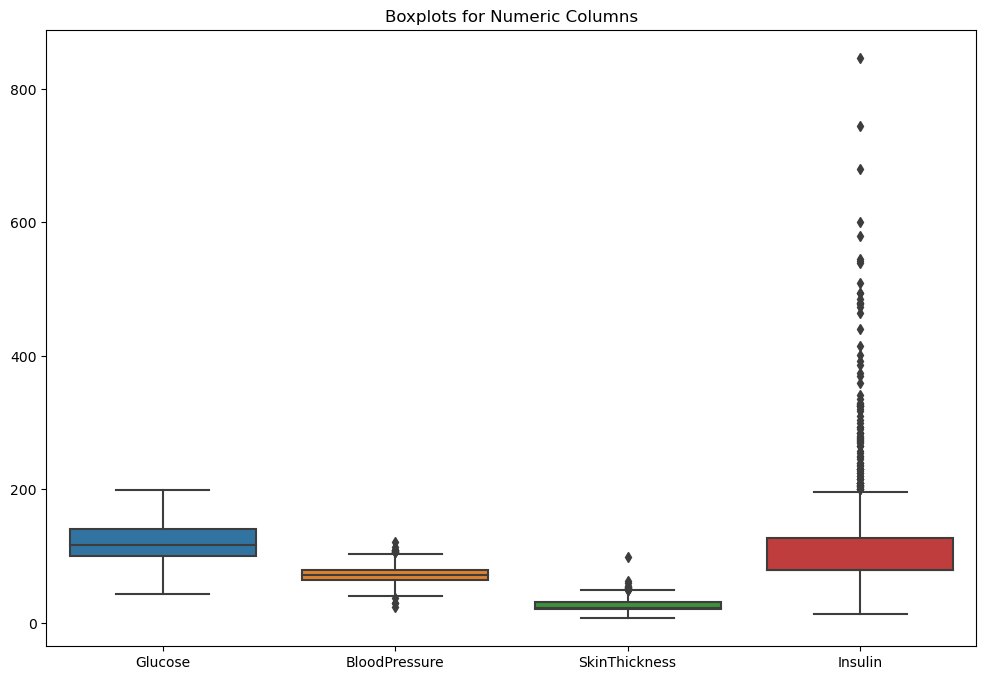

In [15]:
from pandas.api.types import CategoricalDtype  # Import CategoricalDtype

# Assuming 'columns' is a DataFrame with numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns") 
plt.show()

In [16]:
# Finding the Outlier Count in the selected Columns: 
def find_outliers_iqr(data, column_name): 
# Calculate the first quartile (Q1) and third quartile (Q3) 
    Q1 = data[column_name].quantile(0.25) 
    Q3 = data[column_name].quantile(0.75)
    # Calculate the interquartile range (IQR) 
    IQR = Q3 - Q1 
# Define the lower and upper bounds for outliers 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
# Find outliers 
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)] 
# Count the number of outliers 
    count_outliers = len(outliers) 
    return count_outliers
# Calculate and print the number of outliers for each column of interest 
for column_name in selected_columns: 
    outlier_count = find_outliers_iqr(data, column_name) 
print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Insulin' column: 89


# Finding the Outlier Count in the selected Columns:

In [17]:
# Finding the Outlier Count in the selected Columns:

def find_outliers_iqr(data, column_name):

    # Calculate the first quartile (Q1) and third quartile (Q3)

    Q1 = data[column_name].quantile(0.25)

    Q3 = data[column_name].quantile(0.75)
 
    # Calculate the interquartile range (IQR)

    IQR = Q3 - Q1
 
    # Define the lower and upper bounds for outliers

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR
 
    # Find outliers

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
 
    # Count the number of outliers

    count_outliers = len(outliers)
 
    return count_outliers
 
# Calculate and print the number of outliers for each column of interest

for column_name in selected_columns:

    outlier_count = find_outliers_iqr(data, column_name)

    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


In [18]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [19]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

data_cleared_iqr

print(data_cleared_iqr.shape)

print(data.shape)

(678, 9)
(768, 9)


In [20]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]
col.shape

(678, 4)

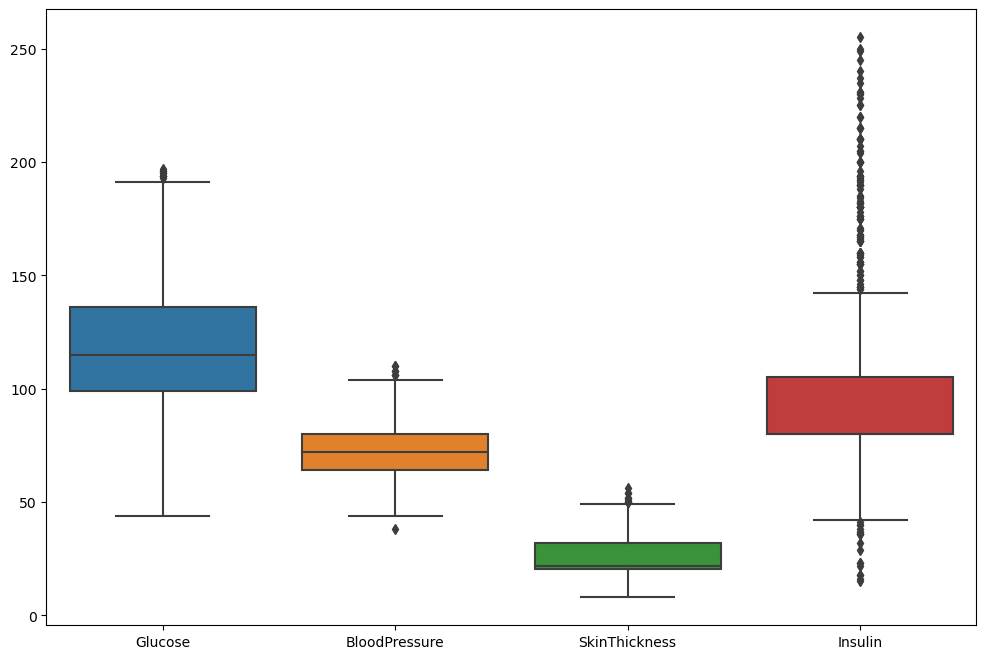

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

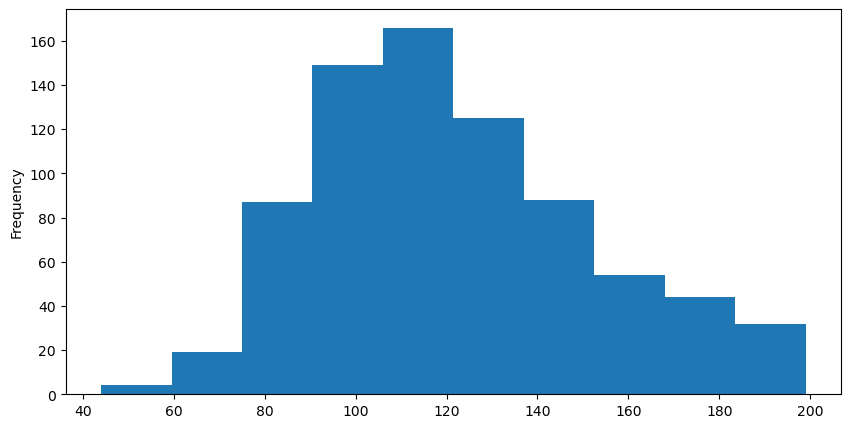

In [93]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

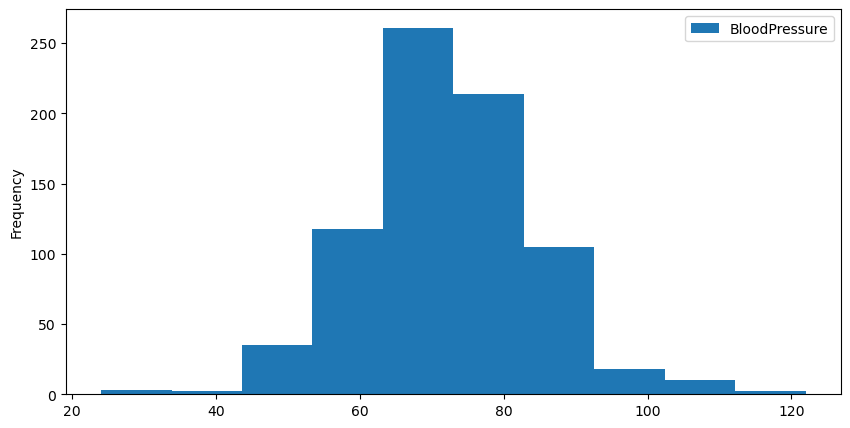

In [23]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

# VIOLIN PLOT

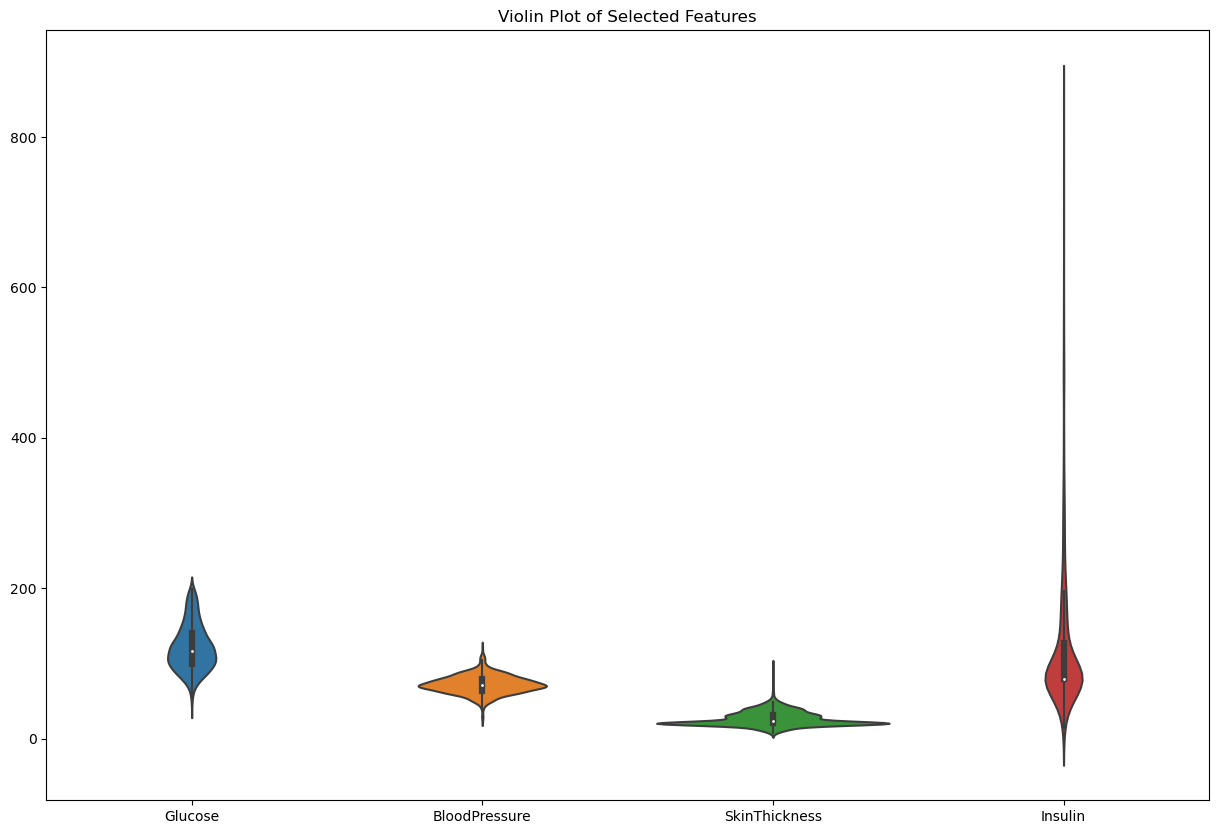

In [24]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot of Selected Features")
plt.show()

# Kernel Density Estimation (KDE) Plot

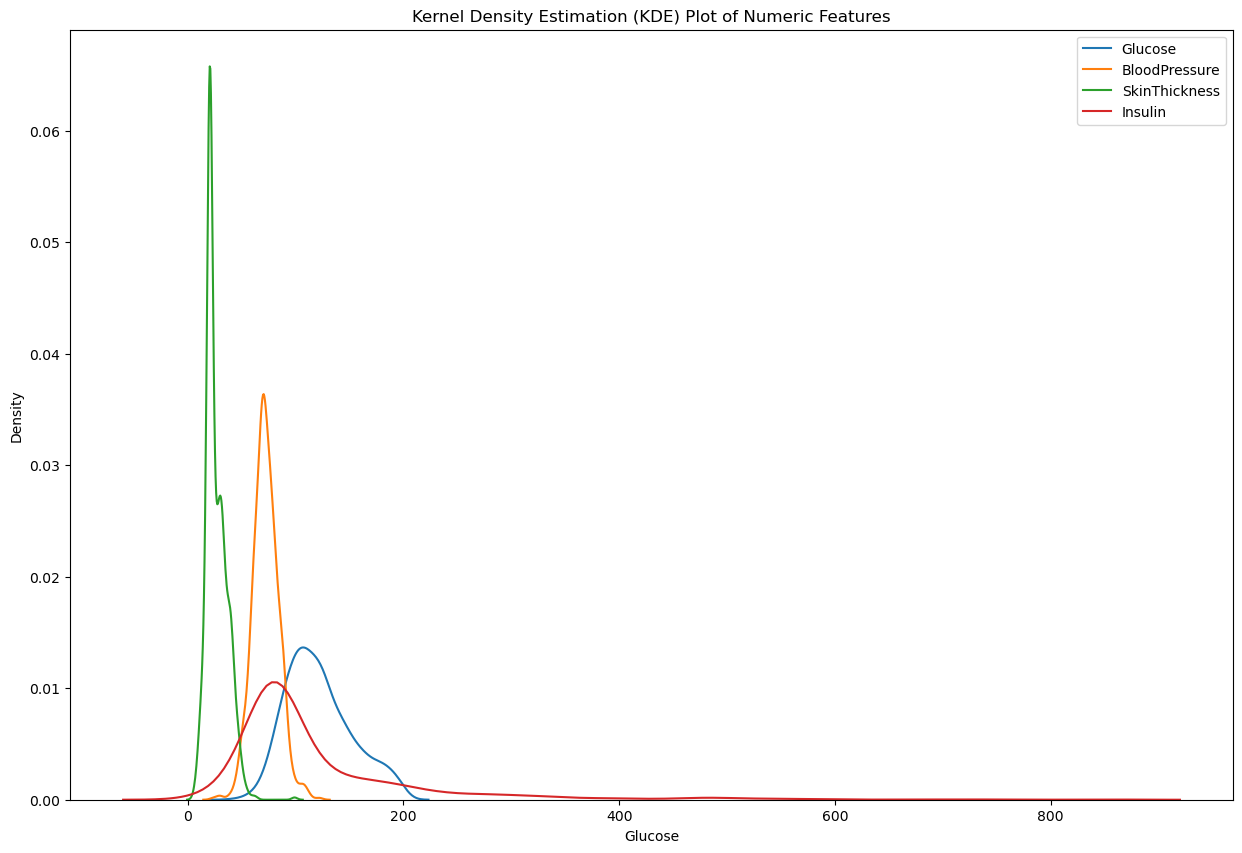

In [25]:
plt.figure(figsize=(15, 10))
for column in selected_columns:
    sns.kdeplot(data[column], label=column)
plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features")
plt.legend()
plt.show()

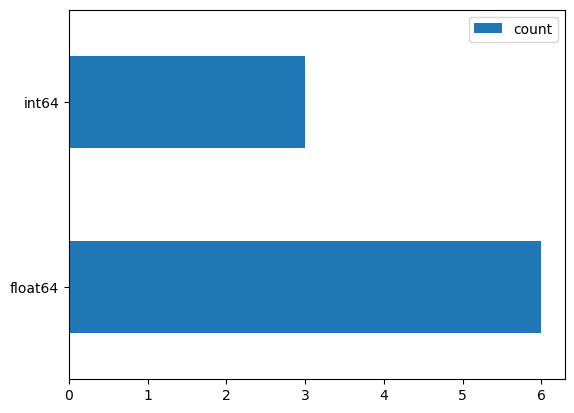

In [26]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

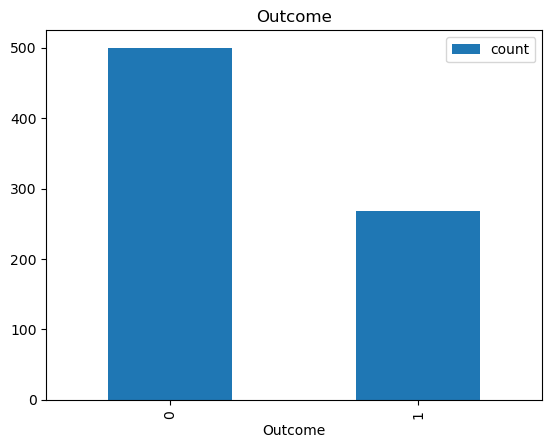

In [27]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [28]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [29]:
balanced_data=100-outcome
balanced_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

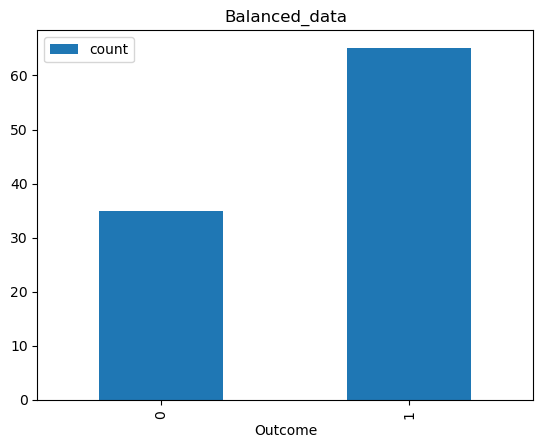

In [30]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')
plt.show()

# SCATTERPLOT

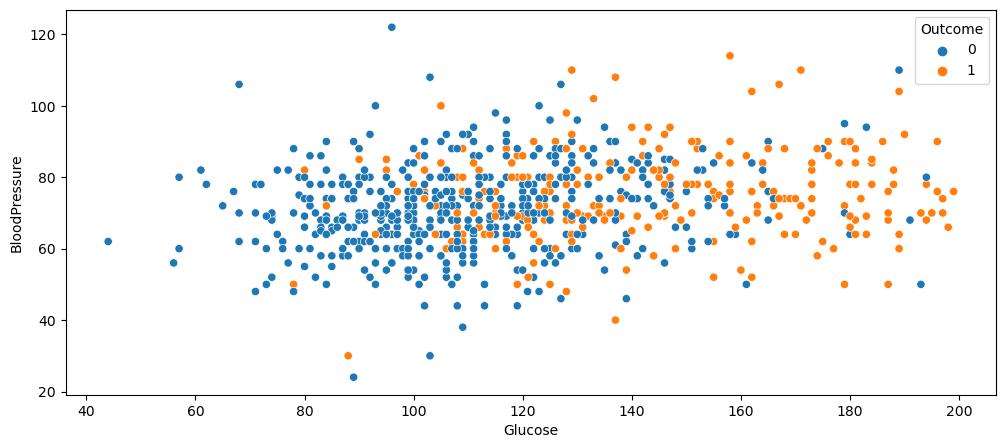

In [31]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

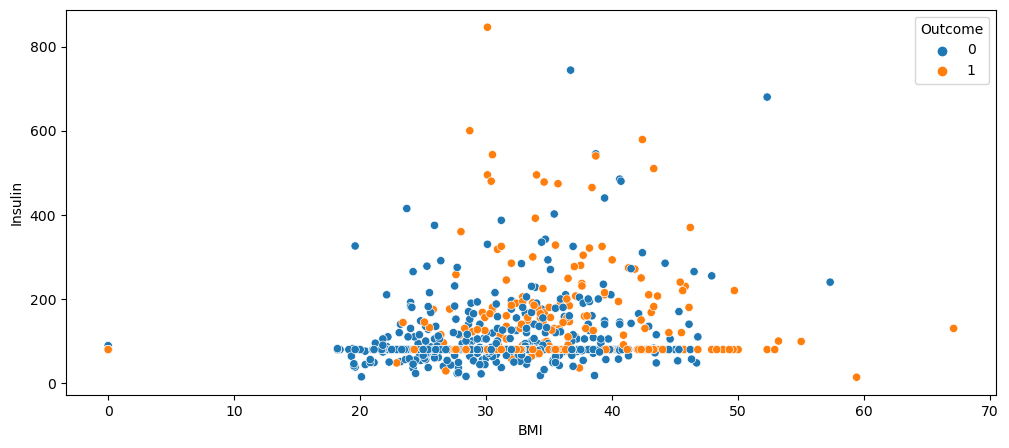

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.show()

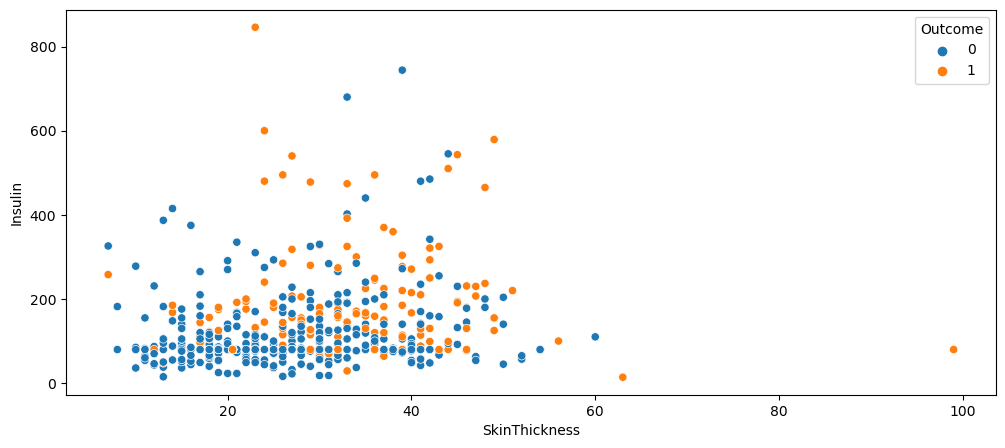

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()

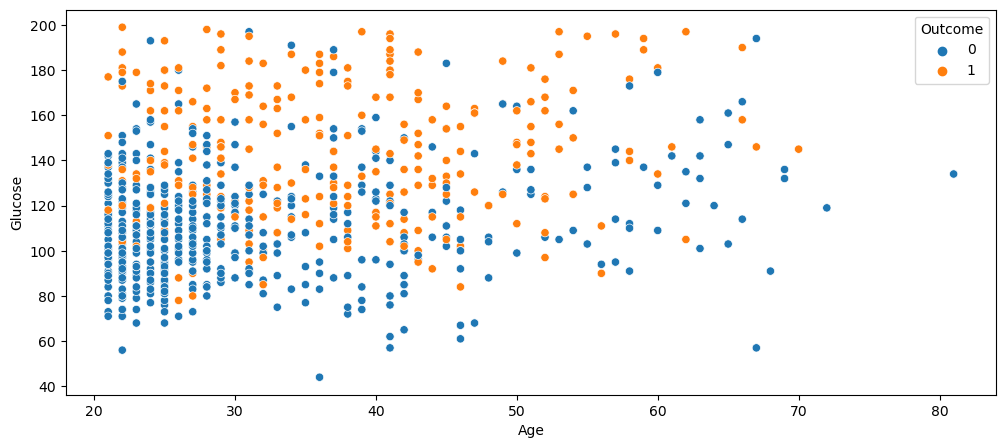

In [34]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

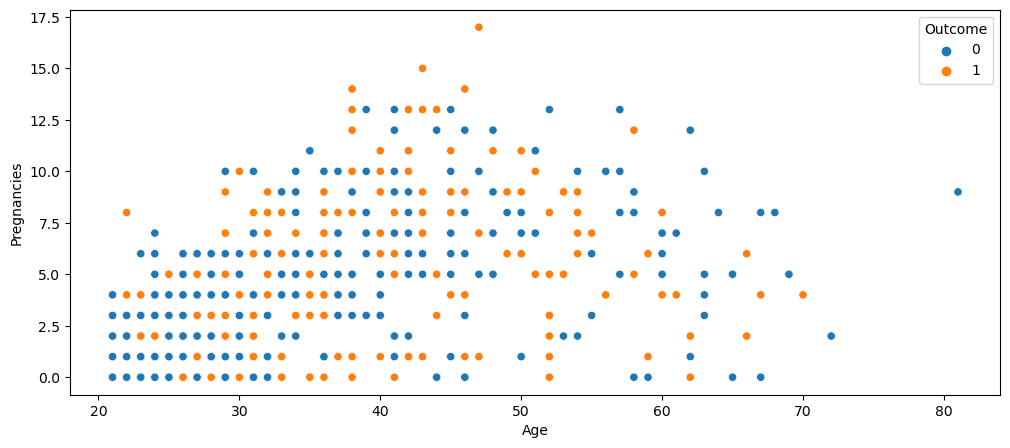

In [35]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

# PAIRPLOT

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


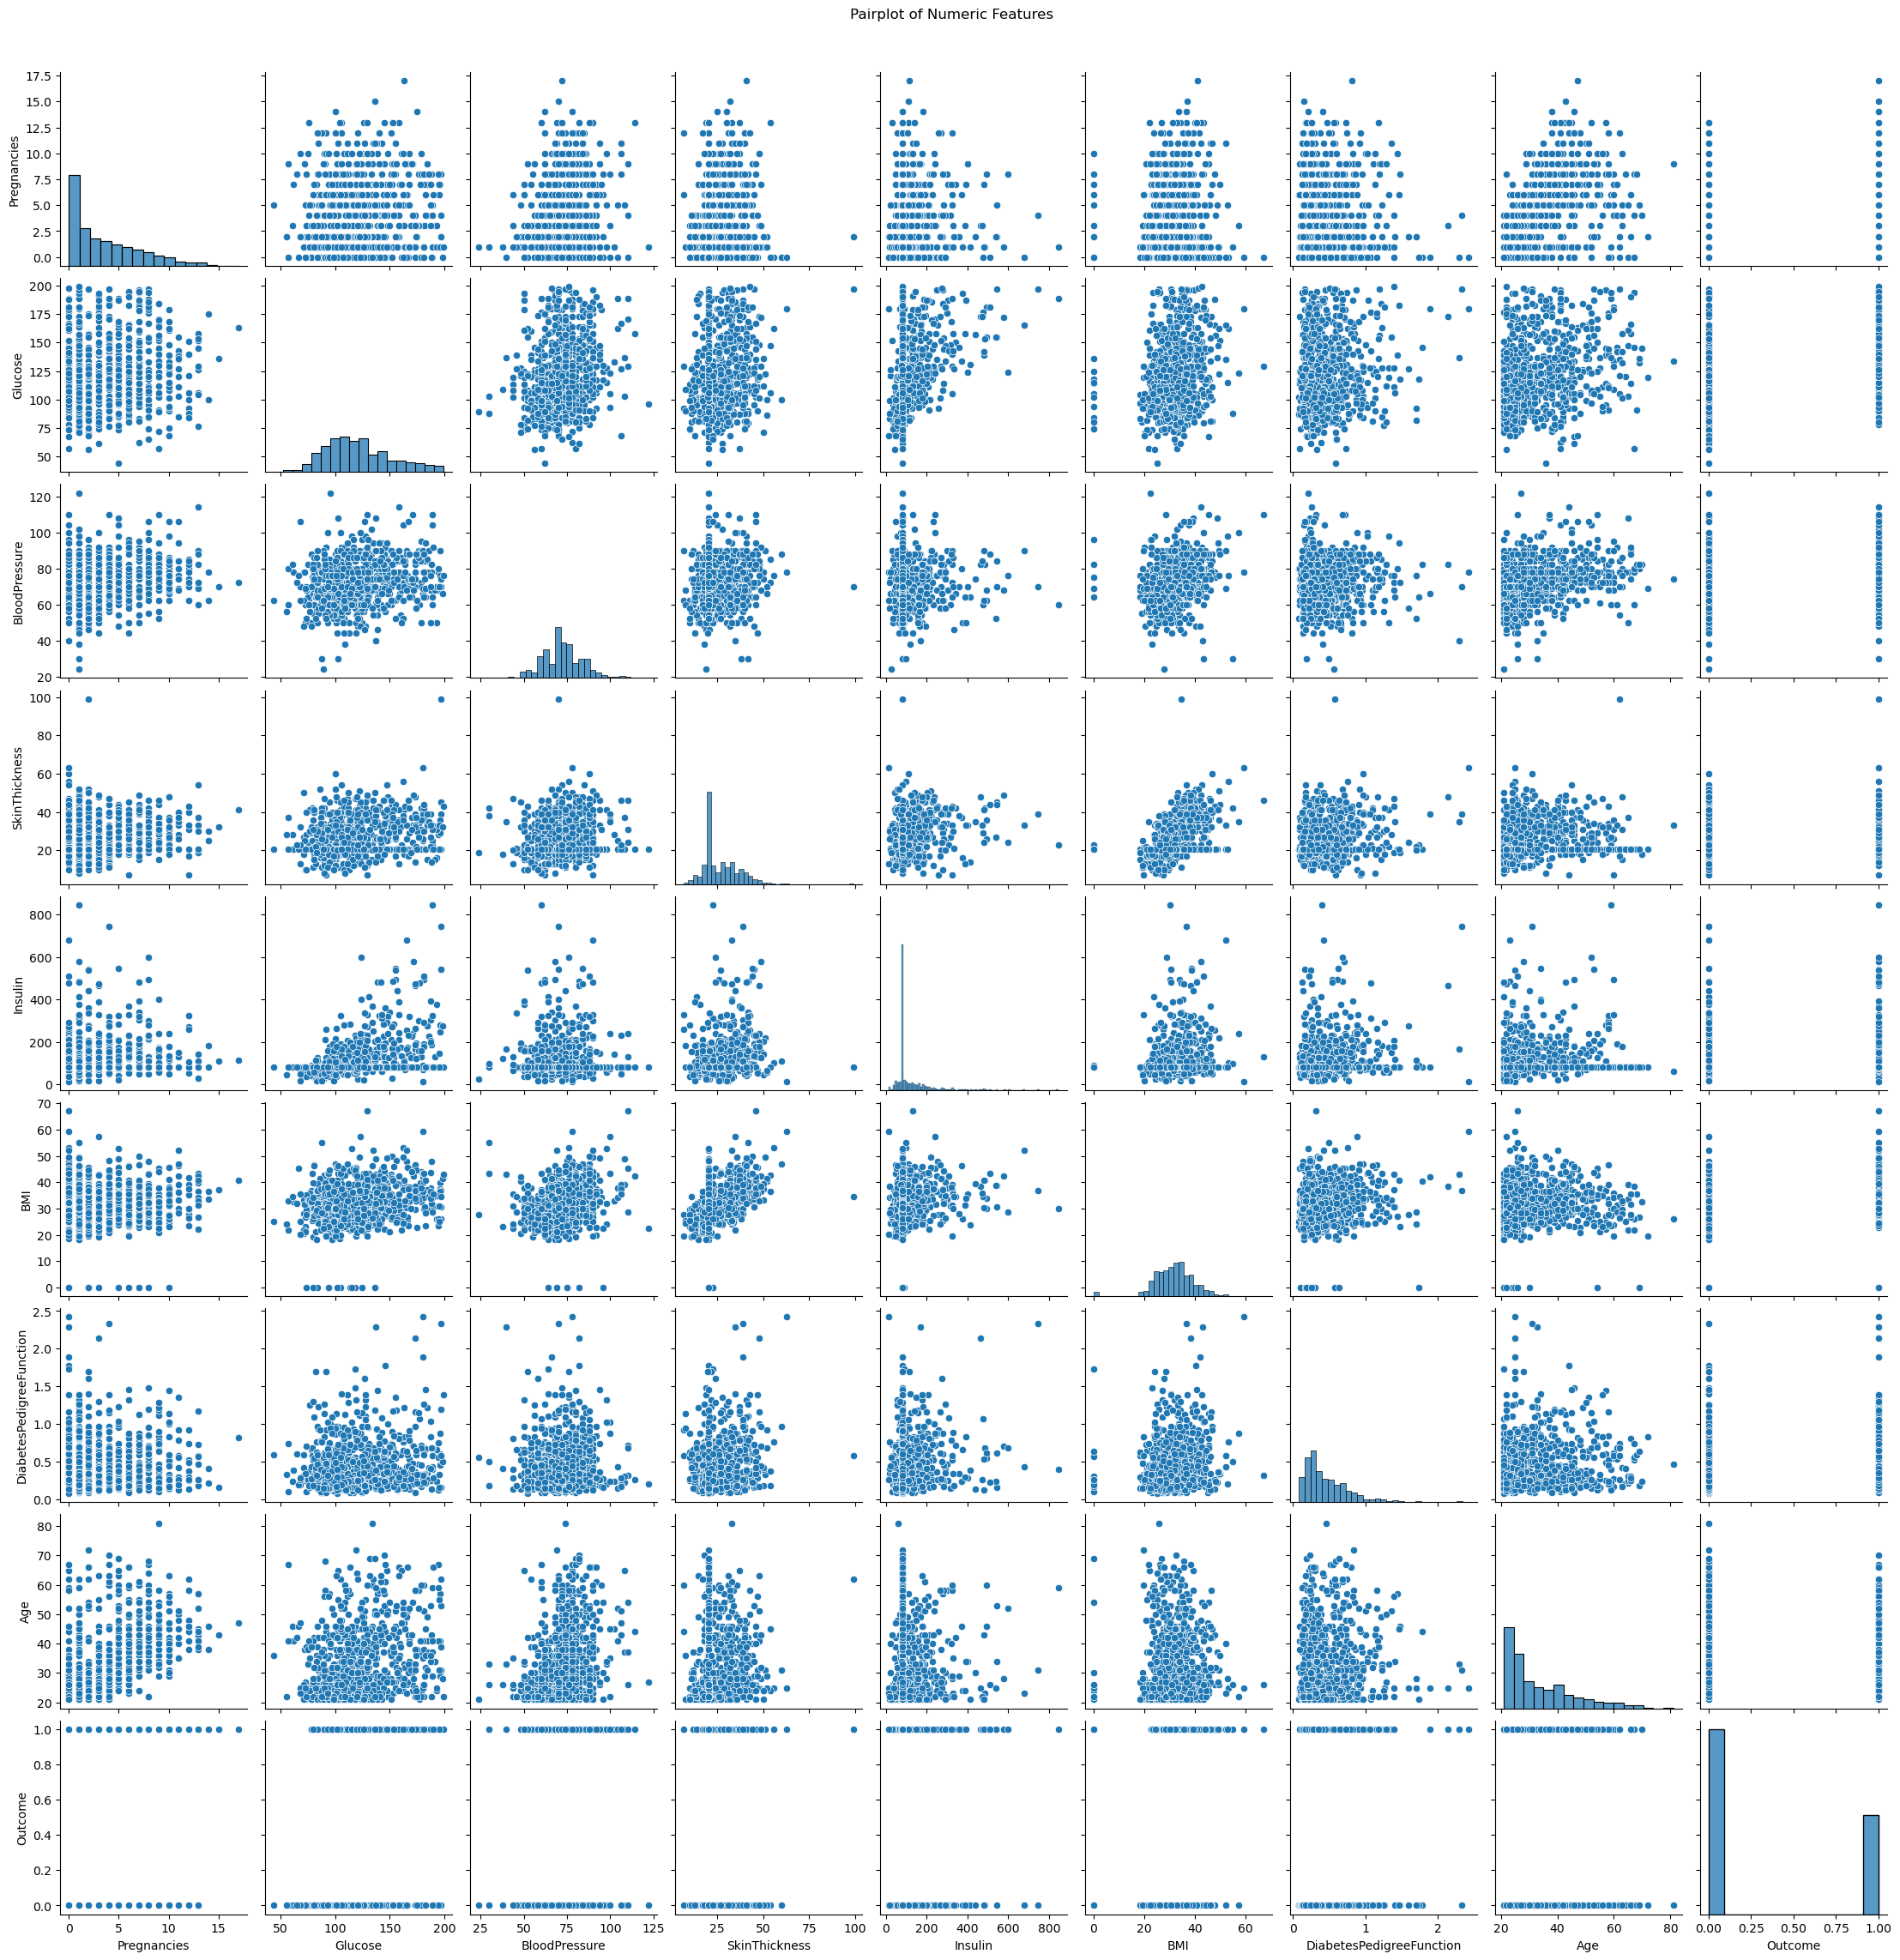

In [36]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# HEAT MAP

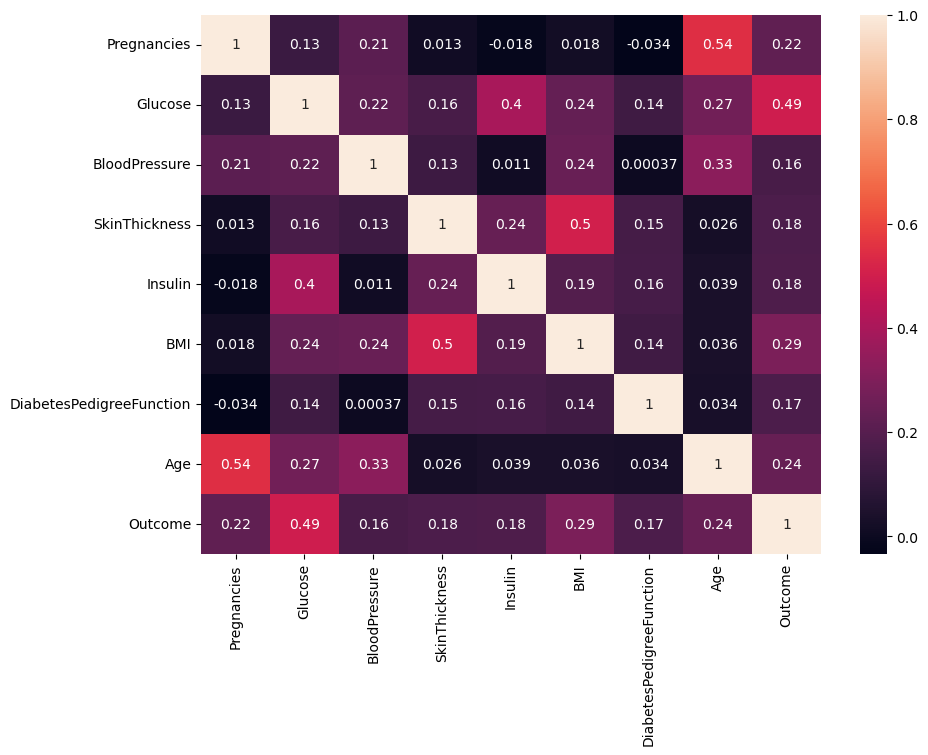

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

 # Data Preparation for Modeling 

In [38]:
x=data.drop(['Outcome'],axis=1) 
y=data['Outcome']
print("Features (X):")
print(x.head())  # Display the first few rows of X

print("\nTarget variable (y):")
print(y.head())  # Display the first few rows of y

Features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Target variable (y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


# Finding the Correlation of every feature with the Outcome (Target Variable) 

In [39]:
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [40]:
bestfeatures = SelectKBest(score_func=chi2, k='all')  # Set k to 10 for the 10 best features
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))  # Print the 10 best features

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


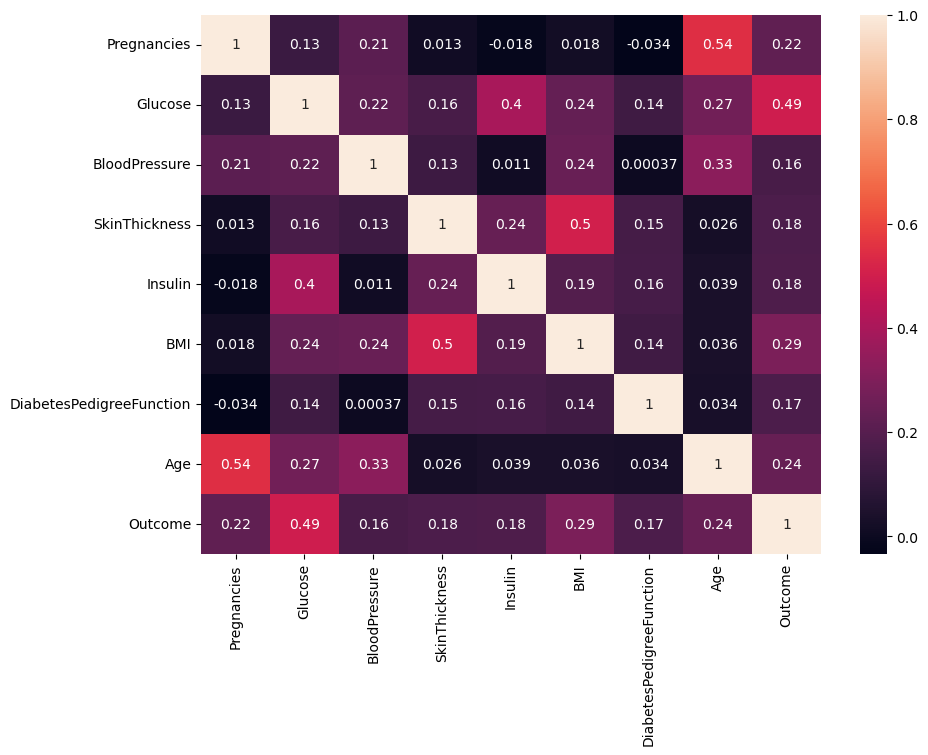

In [41]:
plt.figure(figsize=(10,7)) 
sns.heatmap(data.corr(),annot=True) 
plt.show()

In [42]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values 
new_y=data.Outcome.values

# Train-Test Split for Data Modeling 

In [43]:
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [44]:
from imblearn.over_sampling import SMOTE 
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0))) 
sm = SMOTE(random_state =63) 
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel()) 
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape)) 
print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 7)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


#  LogisticRegression MODEL

In [45]:
logreg=LogisticRegression(solver='liblinear',random_state=123)

In [47]:
# Assuming you have training data trainx and labels trainy
logreg.fit(trainx, trainy)

# Assuming you have testing data testx
prediction = logreg.predict(testx)

In [48]:
print('Accuracy_score -',accuracy_score(testy,prediction))
print('Mean_squared_error -',mean_squared_error(testy,prediction))

Accuracy_score - 0.7272727272727273
Mean_squared_error - 0.2727272727272727


In [49]:
print((confusion_matrix(testy,prediction)))

[[89  6]
 [36 23]]


In [50]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        95
           1       0.79      0.39      0.52        59

    accuracy                           0.73       154
   macro avg       0.75      0.66      0.67       154
weighted avg       0.74      0.73      0.70       154



# Preparing ROC Curve (Receiver Operating Characteristics Curve)

AUC: 0.836


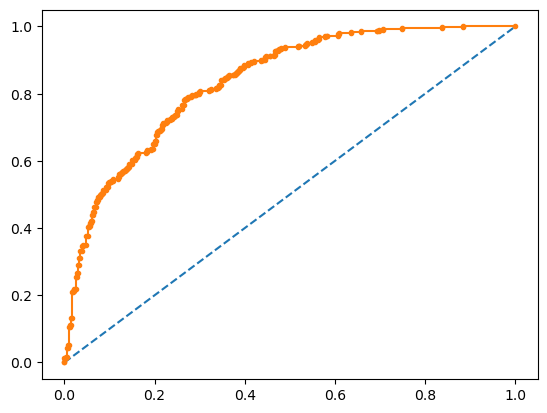

In [55]:

from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 

# predict probabilities 
probs = logreg.predict_proba(trainx_res) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] 
# calculate AUC 
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc) 
# calculate roc curve 
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
 # plot no skill 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model 
plt.plot(fpr, tpr, marker='.')
plt.show()

# RandomForestClassifier

In [56]:
rf=RandomForestClassifier(random_state=42,max_depth=5)
rf.fit(trainx_res,trainy_res)
rf_predict=rf.predict(testx)

In [57]:
print('Accuracy_score -',accuracy_score(testy,rf_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_predict))

Accuracy_score - 0.7402597402597403
Mean_squared_error - 0.2597402597402597


In [62]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3], 'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3, n_estimators= 400,random_state=42)
rf_grid.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [66]:
rf_grid_predict=rf_grid.predict(testx)
print('Accuracy_score -',accuracy_score(testy,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))

Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662


In [67]:
 print((confusion_matrix(testy,prediction)))
 print(classification_report(testy,prediction))

[[89  6]
 [36 23]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        95
           1       0.79      0.39      0.52        59

    accuracy                           0.73       154
   macro avg       0.75      0.66      0.67       154
weighted avg       0.74      0.73      0.70       154



AUC: 0.938


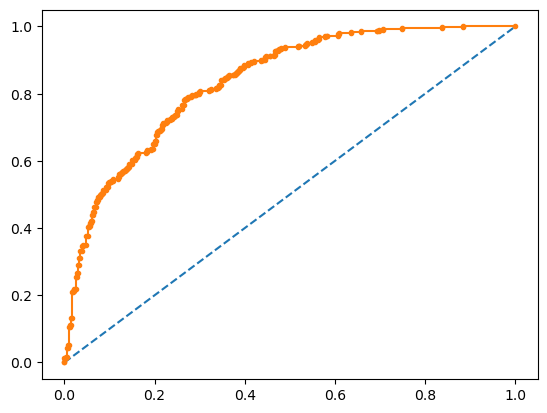

In [84]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve) 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 # predict probabilities
probs = rf.predict_proba(trainx_res) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] 
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
 # calculate roc curve fpr, tpr, thresholds = roc_curve(trainy_res, probs)
 # plot no skill
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model 
plt.plot(fpr, tpr, marker='.')
plt.show()

# DecisionTreeClassifier

In [72]:
 dc=DecisionTreeClassifier(random_state=42)
 dc.fit(trainx_res,trainy_res)
 dc_pred=dc.predict(testx)
 print('Accuracy_score -',accuracy_score(testy,dc_pred))
 print('Mean_squared_error -',mean_squared_error(testy,dc_pred))

Accuracy_score - 0.6623376623376623
Mean_squared_error - 0.33766233766233766


In [76]:
import warnings 
warnings.filterwarnings('ignore')
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3], 'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]} 
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2) 
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Assuming you have training data trainx_res, labels trainy_res
# and testing data testx, labels testy
# Assuming you have already defined and fitted the model dc_final

# Train the model
dc_final.fit(trainx_res, trainy_res)

# Make predictions on the test set
dc_final_pred = dc_final.predict(testx)

# Now you can print accuracy and mean squared error
print('Accuracy Score:', accuracy_score(testy, dc_final_pred))
print('Mean Squared Error:', mean_squared_error(testy, dc_final_pred))


Accuracy Score: 0.6883116883116883
Mean Squared Error: 0.3116883116883117


In [79]:
print((confusion_matrix(testy,dc_final_pred)))
print((classification_report(testy,dc_final_pred)))

[[73 22]
 [26 33]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



# KNeighborsClassifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(trainx_res,trainy_res)
knn_pred=knn.predict(testx)
print('Accuracy_score -',accuracy_score(testy,knn_pred)) 
print('Mean_squared_error -',mean_squared_error(testy,knn_pred))


Accuracy_score - 0.6233766233766234
Mean_squared_error - 0.37662337662337664


In [83]:
print((confusion_matrix(testy,knn_pred)))
print((classification_report(testy,knn_pred)))

[[68 27]
 [31 28]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.51      0.47      0.49        59

    accuracy                           0.62       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.62      0.62      0.62       154



AUC: 0.951


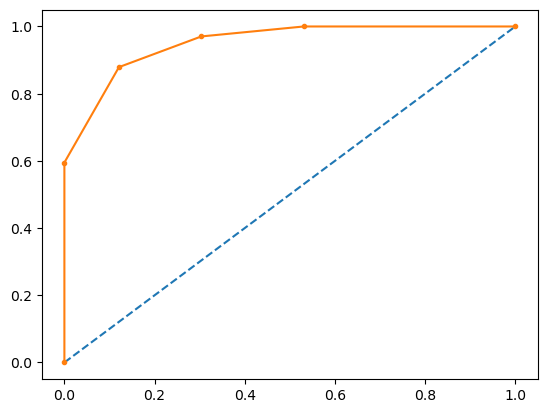

In [85]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 # predict probabilities
probs = knn.predict_proba(trainx_res) 
# keep probabilities for the positive outcome only
probs = probs[:, 1] 
# calculate AUC 
auc = roc_auc_score(trainy_res, probs) 
print('AUC: %.3f' % auc) 
# calculate roc curve 
fpr, tpr, thresholds = roc_curve(trainy_res, probs) 
# plot no skill 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model 
plt.plot(fpr, tpr, marker='.') 
plt.show()

In [87]:
Algorithms=['KNN','RandomForest','Decisiontree','logreg'] 
Accuracy_Score=[accuracy_score(testy,knn_pred),accuracy_score(testy,rf_grid_predict),accuracy_score(testy,dc_final_pred),accuracy_score(testy,prediction)] 
# Create a DataFrame
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score}) 
# Display the accuracy table
print(accuracy_df)

      Algorithm  Accuracy
0           KNN  0.623377
1  RandomForest  0.733766
2  Decisiontree  0.688312
3        logreg  0.727273


In [91]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear',random_state=123) 
dt_cv=DecisionTreeClassifier(random_state=123) 
knn_cv=KNeighborsClassifier() 
rf_cv=RandomForestClassifier(random_state=123) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Random Forest'} 
cv_models=[logreg_cv,dt_cv,knn_cv,rf_cv]
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, trainx, trainy, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7768376520359598
Decision Tree Test Accuracy: 0.7053146483342146
KNN Test Accuracy: 0.7229772607086197
Random Forest Test Accuracy: 0.762083553675304
